## 선형 회귀 & 비용 최소화

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.12.0


### Cost function in pure Python

In [3]:
import numpy as np

X = np.array([1,2,3])
Y = np.random.rand(3)

def cost_func(W, X, Y):
    c = 0 
    for i in range(len(X)):
        c += (W * X[i] - Y[i] ** 2)     # Cost function
        return c / len(X)
    
for feed_W in np.linspace(-3, 5, num=15):
    curr_cost = cost_func(feed_W, X, Y)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   -1.26469
-2.429 |   -1.07421
-1.857 |   -0.88373
-1.286 |   -0.69326
-0.714 |   -0.50278
-0.143 |   -0.31231
 0.429 |   -0.12183
 1.000 |    0.06865
 1.571 |    0.25912
 2.143 |    0.44960
 2.714 |    0.64007
 3.286 |    0.83055
 3.857 |    1.02103
 4.429 |    1.21150
 5.000 |    1.40198


np.linspace(start, stop, num)
시작점과 끝점은 필수 인자이며, num값은 주어지지 않았을 때 기본적으로 50의 값을 가짐 (즉, 50등분)
반환값 1차원 ndarray

linspace와 arange의 차이
-  linspace는 num을 받아 개수 조정
- arange는 step을 받아 간격 조정

### Cost function in TensorFlow

In [4]:
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.1, 3.1, 4.1, 5.1, 6.1])

def cost_func(W, X, Y):
    hypothesis = W * X
    return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num= 15)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |  203.61000
-2.429 |  153.14469
-1.857 |  109.86306
-1.286 |   73.76510
-0.714 |   44.85082
-0.143 |   23.12020
 0.429 |    8.57327
 1.000 |    1.21000
 1.571 |    1.03041
 2.143 |    8.03449
 2.714 |   22.22224
 3.286 |   43.59367
 3.857 |   72.14878
 4.429 |  107.88755
 5.000 |  150.81000


In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

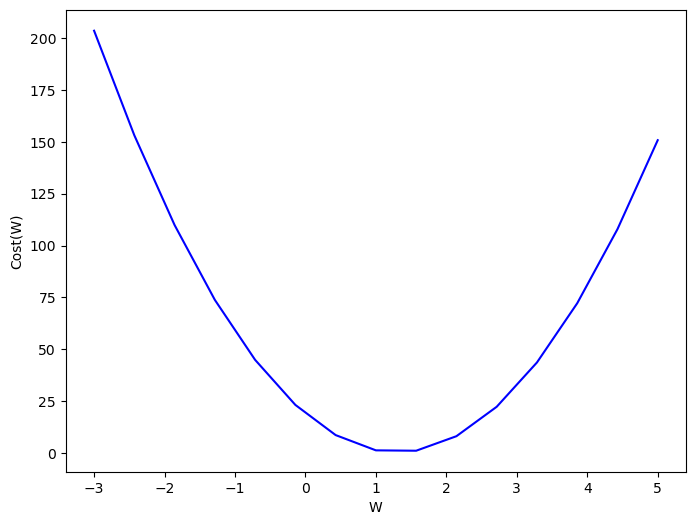

In [6]:
plt.plot(W_values, cost_values,"b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

### How to minmize cost?
- 현재 데이터 X와 Y에 대해 W가 1일 때 cost가 가장 작음
- cost가 최소가 되는 W를 어떻게 찾을 수 있을까